In [408]:
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.colors import LogNorm
import pandas as pd
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

# Section 1

In [206]:
flat_image_data = fits.getdata('./data/flat.0012.fits', ext=0)

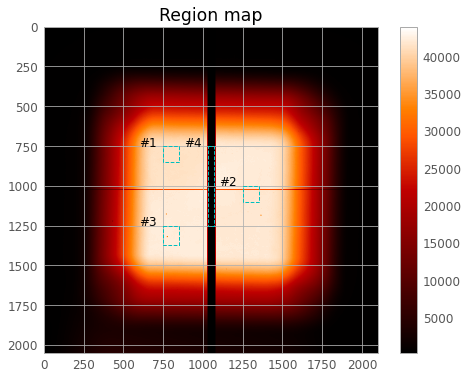

In [371]:
# region is defined as (x, y, w, h)
regions = [
    (750, 750, 100, 100),
    (1250, 1000, 100, 100),
    (750, 1250, 100, 120),
    (1030, 750, 40, 500)
]

def plot_regions(image_data, regions, vmax = None, vmin = None, region_labels = True, border_color = 'c'):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = ax.imshow(image_data, vmin = vmin, vmax = vmax)
    plt.title('Region map')
    for i, r in enumerate(regions):
        x, y, w, h = r
        if region_labels:
            ax.text(x-150, y, "#{}".format(i+1), color='k')
        rect = patches.Rectangle((x, y), w, h, linewidth=1, linestyle='--',
                                 edgecolor=border_color, facecolor="none")
        ax.add_patch(rect)

    fig.colorbar(mappable = im)
    plt.show()

def get_region(image_data, region_coords):
    x, y, w, h = region_coords
    region = image_data[y:(y+h), x:(x+w)]
    return region, (w * h, np.mean(region.flat), np.std(region.flat))

plot_regions(flat_image_data, regions)

In [372]:
flat_region_info = [get_region(flat_image_data, region) for region in regions]

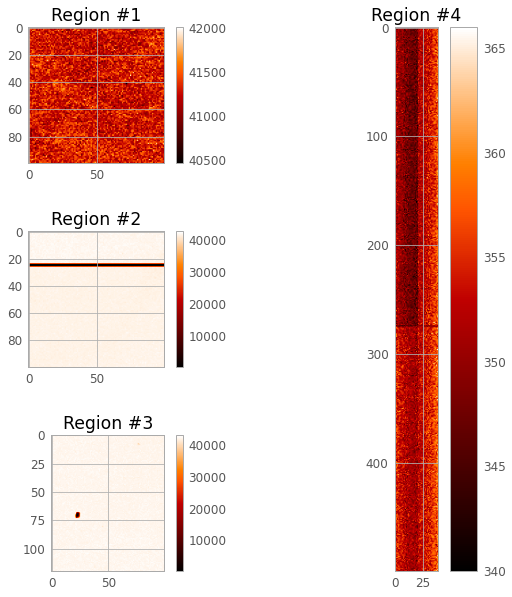

In [373]:
fig = plt.figure(figsize=(9, 10))
fig.tight_layout()
axs = [plt.subplot(321), plt.subplot(323), plt.subplot(325), plt.subplot(122)]
for i, ax in enumerate(axs):
    ax.set_title("Region #{}".format(i+1))
    im = ax.imshow(flat_region_info[i][0])
    fig.colorbar(mappable = im, ax = ax)

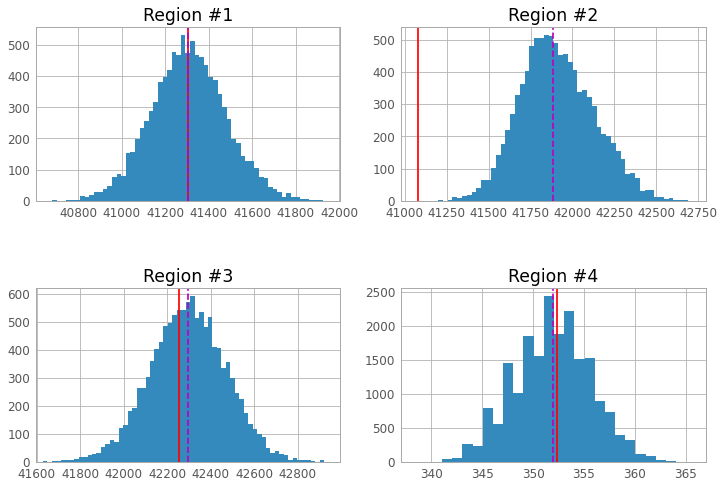

In [374]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
for i, ax in enumerate(axs.flat):
    data = flat_region_info[i][0].flat
    N, mean, std = flat_region_info[i][1]
    ax.set_title("Region #{}".format(i+1))
    median = np.median(data)
    ax.axvline(x = mean, color = 'r', label = 'mean')
    ax.axvline(x = median, color = 'm', label = 'median', linestyle='--')
    dx = max(700, np.abs(mean - median) + 100)
    if median - dx < 0:
        dx = min(4 * std, median)
        ax.hist(data, bins=np.arange(median-dx, median+dx, 1))
    else:
        ax.hist(data, bins='fd')
    ax.set_xlim([median - dx, median + dx])
plt.show()

In [375]:
flat_stats_df = pd.DataFrame(np.array([r[1] for r in flat_region_info]), columns=("N", "Mean", "Std"))
flat_stats_df

,N,Mean,Std
0,10000.0,41306.996600,174.056696
1,10000.0,41078.176700,5818.827523
2,12000.0,42253.985333,1147.204912
3,20000.0,352.360000,3.736910


In [376]:
bias_image_data = fits.getdata('./data/bias.0002.fits', ext=0)

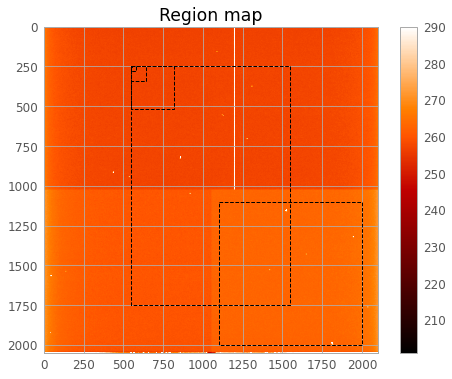

In [378]:
x0 = 550
y0 = 250  
regions = [
    (x0, y0, 5, 5),
    (x0, y0, 30, 30),
    (x0, y0, 90, 90),
    (x0, y0, 270, 270),
    (x0, y0, 1000, 1500),
    (1100, 1100, 900, 900)    
]

bias_region_info = [get_region(bias_image_data, region) for region in regions]

plot_regions(bias_image_data, regions, vmax = 290, region_labels = False, border_color='k')

In [379]:
bias_stats_df = pd.DataFrame(np.array([r[1] for r in bias_region_info]), columns=("N", "Mean", "Std"))
bias_stats_df

,N,Mean,Std
0,25.0,257.280000,1.908298
1,900.0,257.245556,2.137686
2,8100.0,257.330123,2.191376
3,72900.0,257.364911,2.185746
4,1500000.0,259.678465,7.139645
5,810000.0,263.308036,9.645201


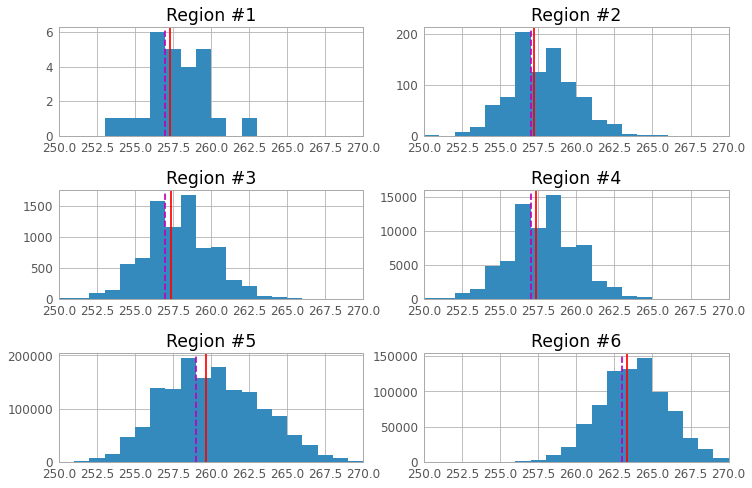

In [380]:
# todo make bins same size
fig, axs = plt.subplots(3, 2, figsize=(12,8))
bins = np.arange(200, 300, 1)
for i, ax in enumerate(axs.flat):
    if i >= len(bias_region_info):
        break
    data = bias_region_info[i][0].flat
    N, mean, std = bias_region_info[i][1]
    ax.set_title("Region #{}".format(i+1))
    ax.hist(data, bins=bins)
    median = np.median(data)
    ax.axvline(x = mean, color = 'r', label = 'mean')
    ax.axvline(x = median, color = 'm', label = 'median', linestyle='--')
    ax.set_xlim([250, 270])
plt.show()

# Section 2

In [314]:
hcg79_image_data = fits.getdata('./data/hcg79_m.0001.fits', ext=0)
hcg79_image_header = fits.getheader('./data/hcg79_m.0001.fits', ext=0)

ngc2998_image_data = fits.getdata('./data/ngc2998.0042b.fits', ext=0)
ngc2998_image_header = fits.getheader('./data/ngc2998.0042b.fits', ext=0)

In [309]:
hcg79_image_header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2102 / length of data axis 1                          
NAXIS2  =                 2050 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
OBSERVAT= 'APO'                / Per the IRAF observatory list.                 
TELESCOP= '3.5m'                                                                
INSTRUME= 'arctic'             / Instrument name                                
LATITUDE= +3.2780361000000E+01 / Latitude of telescope base                     
LONGITUD= -1.0582041700000E+02 / Longitude of telescope base                    
TIMESYS = 'TAI'                / Time system for DATE-OBS                       
UTC-TAI = -37.0             

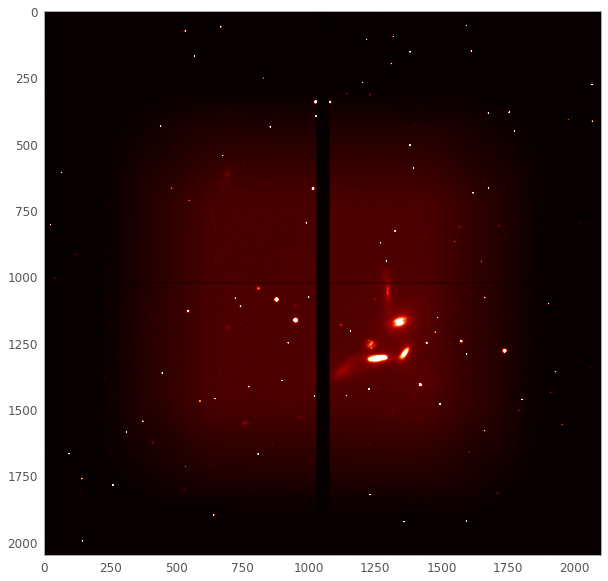

In [381]:
# https://en.wikipedia.org/wiki/Seyfert%27s_Sextet
plt.figure(figsize=(10, 10))
plt.imshow(hcg79_image_data, vmin=250, vmax=6000)
plt.grid(False)

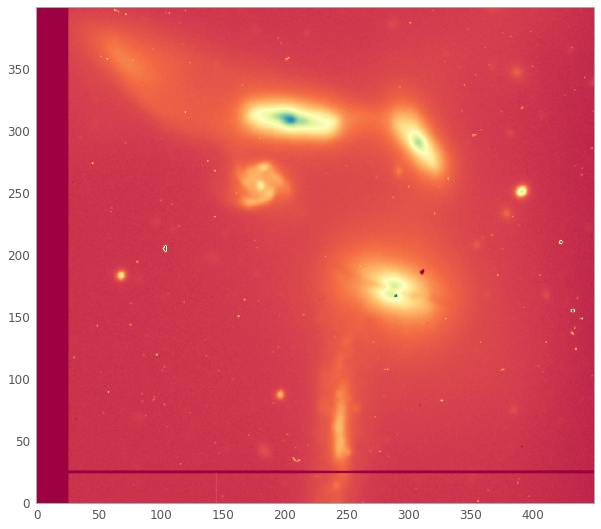

In [428]:
plt.figure(figsize=(10, 10))
plt.imshow(hcg79_image_data[1000:1400, 1050:1500], cmap='Spectral', norm=LogNorm(vmin=1000, vmax=70000), origin='lower')
plt.grid(False)

In [315]:
ngc2998_image_header

SIMPLE  =                    T                                                  
BITPIX  =                   16                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 2098                                                  
NAXIS2  =                 1078                                                  
OBSERVAT= 'APO'                / Per the IRAF observatory list.                 
TELESCOP= '3.5m'                                                                
INSTRUME= 'DIS'                / Instrument name                                
LATITUDE= +3.2780361000000E+01 / Latitude of telescope base                     
LONGITUD= -1.0582041700000E+02 / Longitude of telescope base                    
TIMESYS = 'TAI'                / Time system for DATE-OBS                       
UTC-TAI = -37.0                / UTC = TAI + UTC_TAI(seconds)                   
UT1-TAI = -36.44            

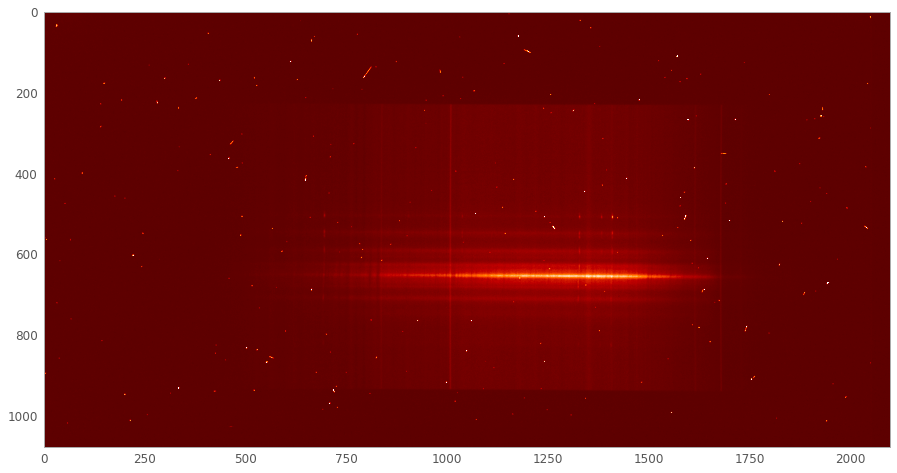

In [382]:
plt.figure(figsize=(18, 8))
plt.imshow(ngc2998_image_data, vmin=0, vmax=400)
plt.grid(False)
plt.show()

In [332]:
flat_image_data.shape

(2050, 2102)

In [334]:
2102 - 2048

54